### **Importing libraries and dataset**

we will import all the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import the language detection dataset from our google drive to colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Language Detection.csv')

In [ ]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [ ]:
data.shape

(10337, 2)

The Language Detection.csv dataset contains 17 different languages.

In [ ]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


# **Visualize that how much language and how much sentences in dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


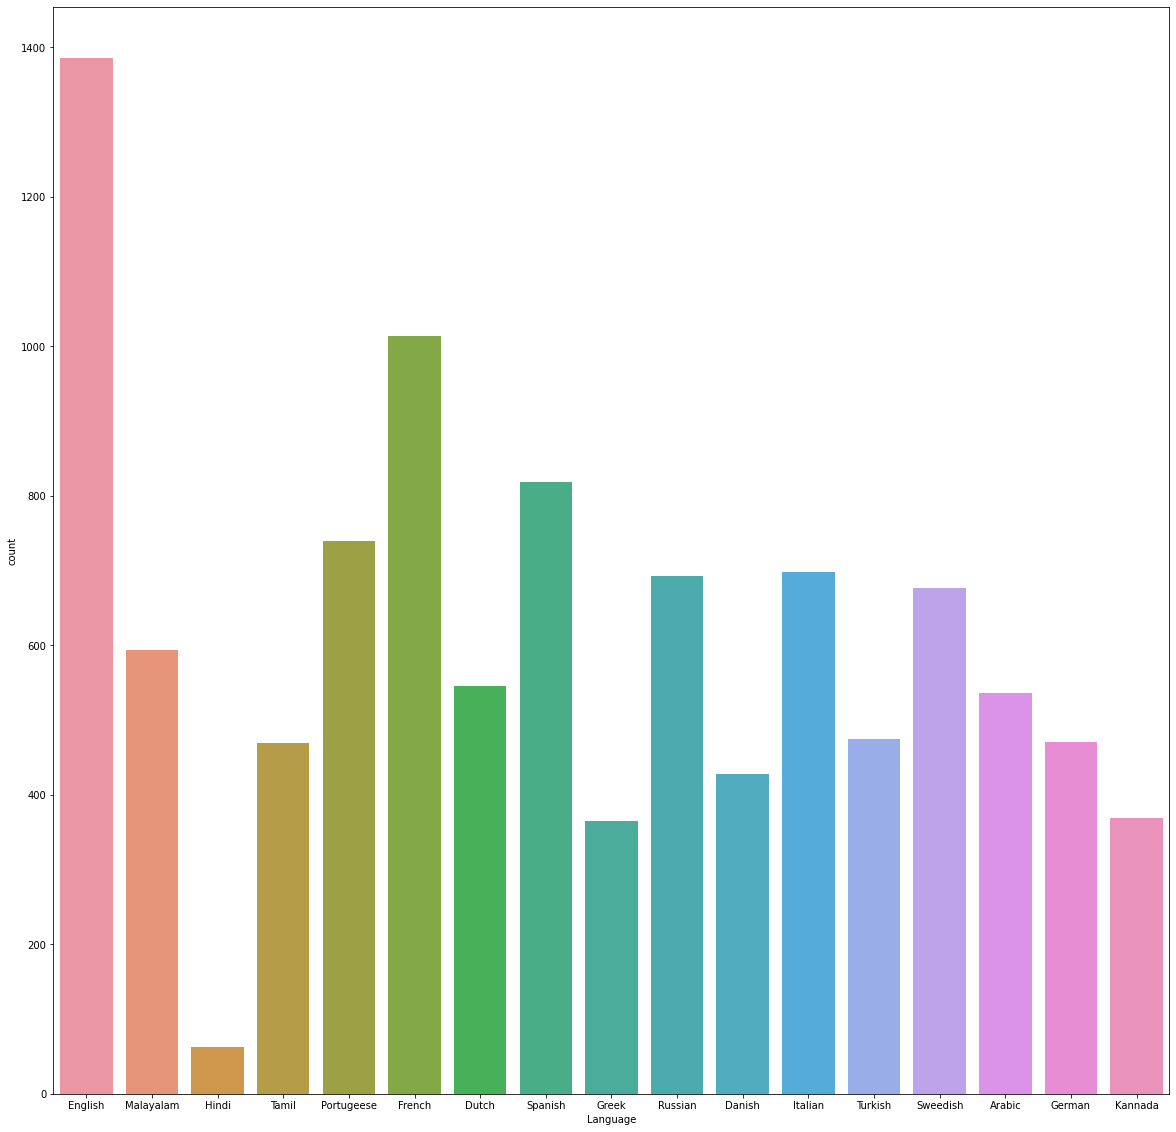

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(data['Language'])

# **Seperating Independent and dependent features**

Here text data is the independent variable and the language name is the dependent variable.

In [ ]:
x = data['Text']
y = data['Language']

# **Label Encoding(Converting language into 1,2,3,...etc)**

Our output variable, the name of languages is a categorical variable. For training the model we should have to convert it into a numerical form, so we are performing label encoding on that output variable. For this process, we are importing LabelEncoder from sklearn.

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
y = Le.fit_transform(y)

# **Text Processing**

Our dataset is made up of software or wikpedia. So it contains unwantes symbols,numbers which has meaning less to the sentence and affect our quality of model.
so, we should perform text processing techniques

In [ ]:
data_list = []
for text in x:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)

# **Bag of Words**

As we all know that, not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape 

(10337, 34937)

In [ ]:
x.head(10)

0     Nature, in the broadest sense, is the natural...
1    "Nature" can refer to the phenomena of the phy...
2    The study of nature is a large, if not the onl...
3    Although humans are part of nature, human acti...
4    [1] The word nature is borrowed from the Old F...
5    [2] In ancient philosophy, natura is mostly us...
6    [3][4] \nThe concept of nature as a whole, the...
7    During the advent of modern scientific method ...
8    [5][6] With the Industrial revolution, nature ...
9    However, a vitalist vision of nature, closer t...
Name: Text, dtype: object

In [ ]:
Le.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

# **Final data looks like**

In [ ]:
data1 = pd.DataFrame(np.c_[data_list,y],columns=['Text','Language'])

In [ ]:
data1

,Text,Language
0,nature i the broadest se se is the atural...,3
1,nature ca refer to the phe ome a of the phy...,3
2,the study of ature is a large if ot the o l...,3
3,although huma s are part of ature huma acti...,3
4,[ ] the word ature is borrowed from the old f...,3
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,9
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,9
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,9
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,9


# **Train Test Splitting**

In this step we create the training set, for training the model and test set, for evaluating the test set. For this process, we are using a train test split.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape,

((8269, 34937), (8269,), (2068, 34937), (2068,))

# **Model Training and Prediction**

 We are using the naive_bayes algorithm for our model creation. Later we are training the model using the training set.

In [ ]:
#from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [ ]:
#classifier = MultinomialNB().fit(x_train,y_train)
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500,activation = 'relu',solver='adam',random_state=1).fit(x_train,y_train)

So we’ve trained our model using the training set. Now let’s predict the output for the test set.

In [ ]:
print(mlp)
pred = classifier.predict(x_test)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)


# **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))

0.9850096711798839


The accuracy of the model is 0.97 which is very good and our model is performing well. Now let’s plot the confusion matrix using the seaborn heatmap.

In [ ]:
print(confusion_matrix(y_test,pred))

[[125   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  79   0   2   0   0   0   0   0   0   0   1   0   0   2   0   0]
 [  0   0 118   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 261   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1 205   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  93   0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   0   2   0   0  84   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0 121   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 122   0   0   0   0   0   0]
 [  0   0   0   1   1   0   0   0   2   0   0 142   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0 152   1   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0 169   0   0   0]
 [  0 

# **Confusion Matrix**

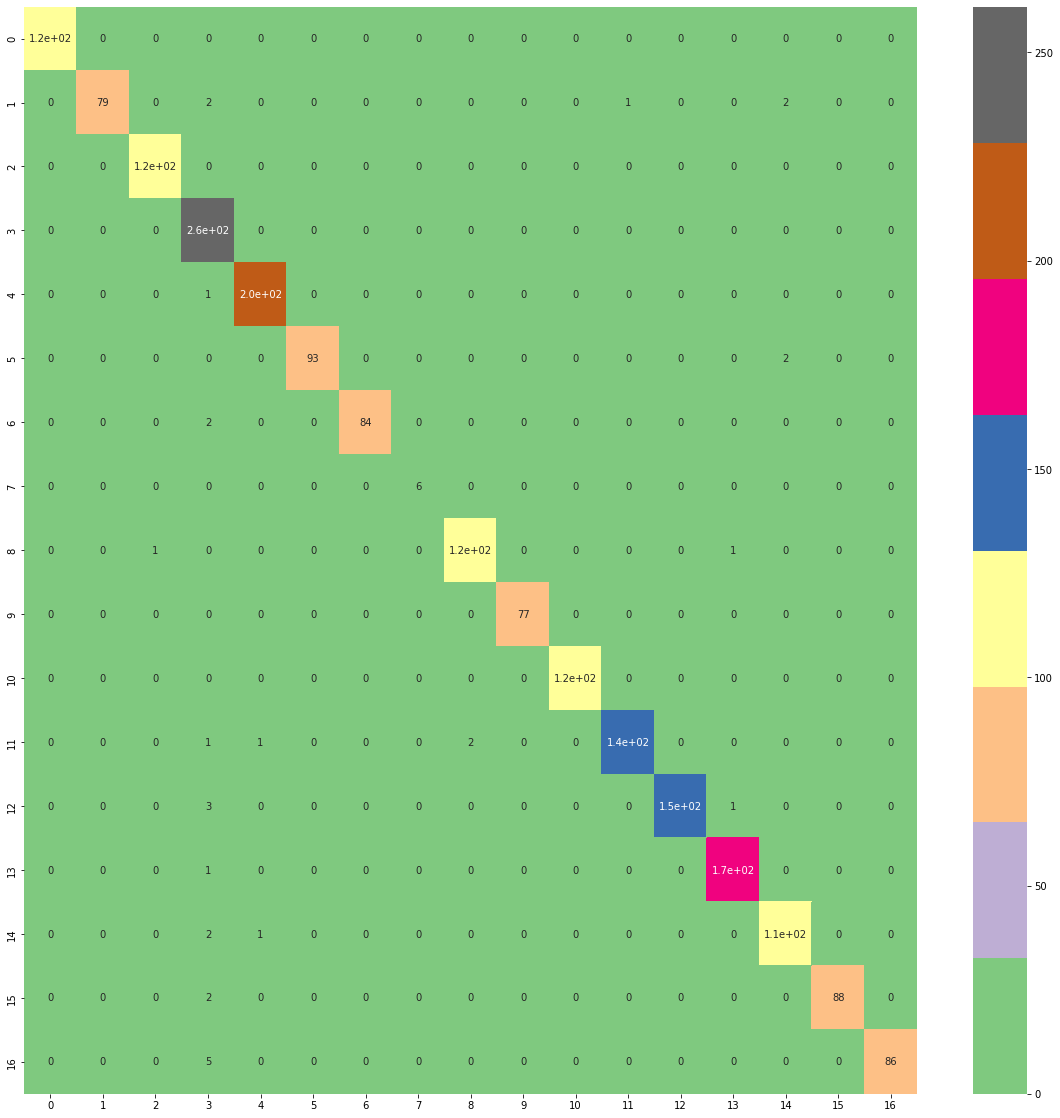

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.Accent)

# **Actual Language and Predicted Language**

In [ ]:
fnl = pd.DataFrame(np.c_[y_test,pred],columns=['Actual','Predicted'])
fnl

,Actual,Predicted
0,6,6
1,11,11
2,4,4
3,4,4
4,12,12
...,...,...
2063,8,8
2064,6,6
2065,9,9
2066,0,0


# **Saving and Loading the model**

In [ ]:
import joblib

joblib.dump(classifier , 'language_identification.sav')

['language_identification.sav']

In [ ]:
model = joblib.load('language_identification.sav')

# **Test Model**

Predicting with some more data.
Now let’s test the model prediction using text in different languages.

In [ ]:
def predict(text):
     x = cv.transform([text]).toarray() 
     lang = model.predict(x) 
     lang = Le.inverse_transform(lang)
     print("The langauge is in",lang[0])

In [ ]:
predict('நாங்கள் நல்ல சிறுவர்கள்')

The langauge is in Tamil


In [ ]:
predict('where are you')

The langauge is in English


In [ ]:
predict('İyi ki doğdun Raman')

The langauge is in Turkish


In [ ]:
# English
predict("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals")
# French
predict("Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")
# Arabic
predict("توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات")
# Spanish
predict("Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science.")
# Malayalam
predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")
# Russian
predict("Analytics Vidhya - это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")

The langauge is in English
The langauge is in French
The langauge is in Arabic
The langauge is in Spanish
The langauge is in Malayalam
The langauge is in Russian


In [ ]:
predict("My name is avinash")

The langauge is in English


In [ ]:
predict("mi nombre es avinash")

The langauge is in Spanish


In [ ]:
predict("हഎന്റെ പേര് അവിനാഷ്")

The langauge is in Malayalam


In [ ]:
predict("I am learing ML in Indian Servers")#English
predict("J'apprends le ML sur les serveurs indiens")#French
predict("Estoy aprendiendo ML en servidores indios")#Spanish
predict("Estou aprendendo ML em servidores indianos")#Portugese
predict("Sto imparando il ML nei server indiani")#Italian
predict("Я изучаю ML на индийских серверах")#Russian
predict("Jag lär mig ML i indiska servrar")#Swedish
predict("ഞാൻ ഇന്ത്യൻ സെർവറുകളിൽ ML പഠിക്കുന്നു")#Malayalam
predict("Ik leer ML in Indiase servers")#Dutch
predict("أنا أتعلم ML في الخوادم الهندية")#Arabic
predict("Hint Sunucularında ML öğreniyorum")#Turkish==>Wrong
predict("Ich lerne ML auf indischen Servern")#German
predict("मैं भारतीय सर्वर में एमएल सीख रहा हूँ")#Hindi
predict("நான் இந்திய சர்வர்களில் எம்எல் படித்து வருகிறேன்")#Tamil
predict("ನಾನು ಭಾರತೀಯ ಸರ್ವರ್‌ಗಳಲ್ಲಿ ಎಂಎಲ್ ಕಲಿಯುತ್ತಿದ್ದೇನೆ")#Kanada
predict("Μαθαίνω ML σε ινδικούς διακομιστές")#Greek
predict("Jeg er ved at lære ML i indiske servere")#Danish

The langauge is in English
The langauge is in French
The langauge is in Spanish
The langauge is in Portugeese
The langauge is in Italian
The langauge is in Russian
The langauge is in Sweedish
The langauge is in Malayalam
The langauge is in Dutch
The langauge is in Arabic
The langauge is in English
The langauge is in German
The langauge is in Hindi
The langauge is in Tamil
The langauge is in Kannada
The langauge is in Greek
The langauge is in Danish
